In [1]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)


## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
jun = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month',Measurement.date) == 6).all()


In [6]:
#  3. Convert the June temperatures to a list.
jun_temps = list((jun))


In [7]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
jun_df = pd.DataFrame(jun_temps,columns=['date','June Temps'])
jun_df.set_index(jun_df['date'], inplace=True)


In [8]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
jun_df.describe()


,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month',Measurement.date) == 12).all()


In [10]:
# 7. Convert the December temperatures to a list.
dec_temps = list((dec))


In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_temps,columns=['date','December Temps'])
dec_df.set_index(dec_df['date'], inplace=True)


In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()


,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


# D3: Additional Queries

In [13]:
jun_prcp_temp = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).\
filter(extract('month',Measurement.date) == 6).all()
junePT=list((jun_prcp_temp))
jun_prcp_temp_df = pd.DataFrame(junePT,columns=['date','Jun Precip','Jun Temps'])
jun_prcp_temp_df.set_index(jun_prcp_temp_df['date'],inplace=True)
jun_prcp_temp_df.describe()


,Jun Precip,Jun Temps
count,1574.000000,1700.000000
mean,0.136360,74.944118
std,0.335731,3.257417
min,0.000000,64.000000
25%,0.000000,73.000000
50%,0.020000,75.000000
75%,0.120000,77.000000
max,4.430000,85.000000


In [14]:
dec_prcp_temp = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).\
filter(extract('month',Measurement.date) == 12).all()
decPT=list((dec_prcp_temp))
dec_prcp_temp_df = pd.DataFrame(decPT,columns=['date','Dec Precip','Dec Temps'])
dec_prcp_temp_df.set_index(dec_prcp_temp_df['date'],inplace=True)
dec_prcp_temp_df.describe()


,Dec Precip,Dec Temps
count,1405.000000,1517.000000
mean,0.216819,71.041529
std,0.541399,3.745920
min,0.000000,56.000000
25%,0.000000,69.000000
50%,0.030000,71.000000
75%,0.150000,74.000000
max,6.420000,83.000000


In [15]:
jun_tstats = jun_df.describe()
dec_tstats = dec_df.describe()

tsummary_df = jun_tstats.merge(dec_tstats, left_index=True, right_index=True)
tsummary_df


,June Temps,December Temps
count,1700.000000,1517.000000
mean,74.944118,71.041529
std,3.257417,3.745920
min,64.000000,56.000000
25%,73.000000,69.000000
50%,75.000000,71.000000
75%,77.000000,74.000000
max,85.000000,83.000000


In [16]:
jun_summary = jun_prcp_temp_df.describe()
dec_summary = dec_prcp_temp_df.describe()

summary_df = jun_summary.merge(dec_summary, left_index=True, right_index=True)
summary_df


,Jun Precip,Jun Temps,Dec Precip,Dec Temps
count,1574.000000,1700.000000,1405.000000,1517.000000
mean,0.136360,74.944118,0.216819,71.041529
std,0.335731,3.257417,0.541399,3.745920
min,0.000000,64.000000,0.000000,56.000000
25%,0.000000,73.000000,0.000000,69.000000
50%,0.020000,75.000000,0.030000,71.000000
75%,0.120000,77.000000,0.150000,74.000000
max,4.430000,85.000000,6.420000,83.000000


In [17]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


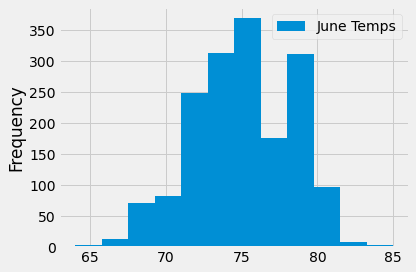

In [18]:
jun_df.plot.hist(bins=12)
plt.tight_layout()


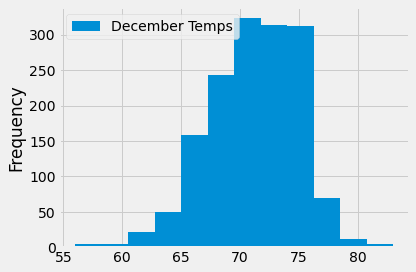

In [19]:
dec_df.plot.hist(bins=12)
plt.tight_layout()


## Software used (and versions)

In [20]:
from platform import python_version

print(python_version())


3.7.13


In [21]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))


matplotlib: 3.5.1


In [22]:
!jupyter --version


Selected Jupyter core packages...
IPython          : 7.31.1
ipykernel        : 6.9.1
ipywidgets       : 7.6.5
jupyter_client   : 6.1.12
jupyter_core     : 4.9.2
jupyter_server   : 1.13.5
jupyterlab       : 3.3.2
nbclient         : 0.5.13
nbconvert        : 6.4.4
nbformat         : 5.3.0
notebook         : 6.4.8
qtconsole        : 5.3.0
traitlets        : 5.1.1


In [23]:
 pd. __version__

'1.3.5'